In [1]:
"""
Created on Sun Aug  6 22:04:01 2023

@author: erhon

# https://stackoverflow.com/questions/32894417/python-pseudo-voigt-fit-experimental-data
"""

import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
from lmfit.models import PseudoVoigtModel

In [ ]:
path_550C_Bi2O3 = r"...\DRX\Bi2O3\Bi2O3_200nm_550C_subtracted.xy"
path_550C_5h_Bi2O3 = r"...\DRX\Alfa_BiO_550C_5h_subtracted.xy"

df_550C_Bi2O3 = pd.read_csv(path_550C_Bi2O3, sep=" ", names = ['2theta','intensity'], header=None)
df_550C_5h_Bi2O3 = pd.read_csv(path_550C_5h_Bi2O3, sep=" ",  skiprows=1, names = ['2theta','intensity'])

In [62]:
bool_p1_1h = df_550C_Bi2O3['2theta'].between(36.75, 38.75, inclusive='both')
df_1h_p1 = df_550C_Bi2O3[bool_p1_1h]

bool_p2_1h = df_550C_Bi2O3['2theta'].between(45.5, 47.5, inclusive='both')
df_1h_p2 = df_550C_Bi2O3[bool_p2_1h]
#######################################################################
bool_p1_5h = df_550C_5h_Bi2O3['2theta'].between(37, 38.25, inclusive='both')
df_5h_p1 = df_550C_5h_Bi2O3[bool_p1_5h]

bool_p2_5h = df_550C_5h_Bi2O3['2theta'].between(45.5, 47.5, inclusive='both')
df_5h_p2 = df_550C_5h_Bi2O3[bool_p2_5h]

In [64]:
def pseudo_V(X, Y, plot_graph=False):
    x = X
    y = Y
    mod = PseudoVoigtModel()
    pars = mod.guess(y, x=x)
    out = mod.fit(y, pars, x=x)
    # print(out.fit_report(min_correl=0.25))
    base_text = out.fit_report(min_correl=0.25)
    
    if plot_graph:
        out.plot()
    for line in base_text.splitlines():
        if "R-squared " in line:
            # R_sqr_line = float(line.split('= ')[1])
            print(line)
        if "center:" in line:
            center_line = float(line.split(':     ')[1].split(' +')[0])
            print(line)
        if "fwhm" in line:
            fwhm_line = float(line.split(':     ')[1].split(' +')[0])
            print(line)
            
    return(center_line,fwhm_line)

    R-squared          = 0.93186948
    center:     37.6763063 +/- 0.00567206 (0.02%) (init = 37.68)
    fwhm:       0.47104984 +/- 0.02301757 (4.89%) == '2.0000000*sigma'
    R-squared          = 0.95023494
    center:     46.4091857 +/- 0.00458150 (0.01%) (init = 46.4)
    fwhm:       0.41473158 +/- 0.01858999 (4.48%) == '2.0000000*sigma'


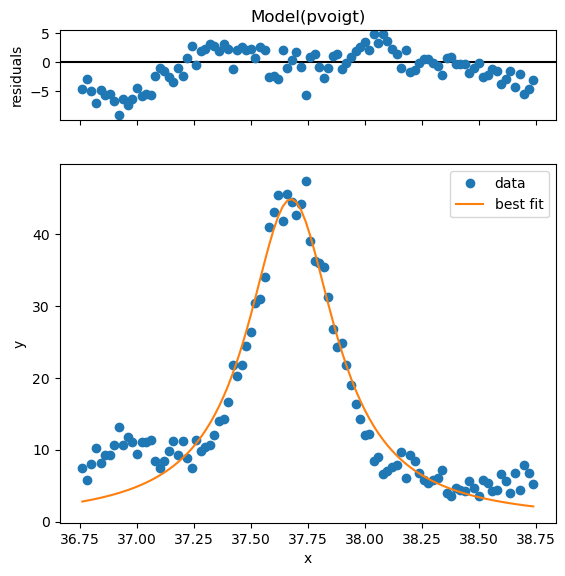

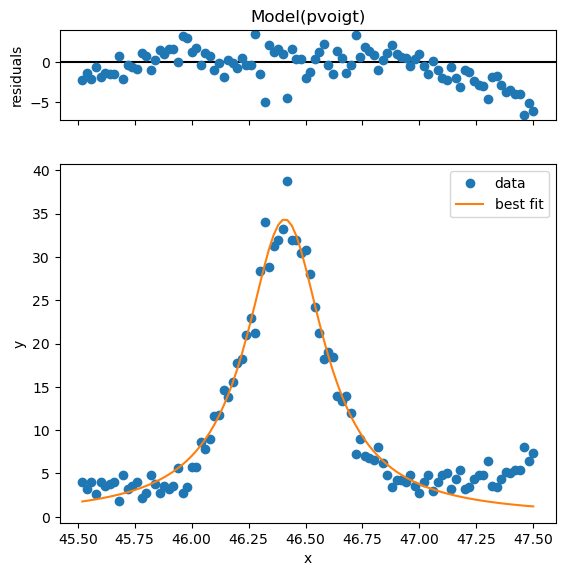

In [66]:
BiO_Alfa_1h_C1,BiO_Alfa_1h_B1 = pseudo_V(X=np.array(df_1h_p1['2theta']), Y=np.array(df_1h_p1['intensity']),plot_graph=True)
BiO_Alfa_1h_C2,BiO_Alfa_1h_B2 = pseudo_V(X=np.array(df_1h_p2['2theta']), Y=np.array(df_1h_p2['intensity']),plot_graph=True)
BiO_Alfa_1h = [[BiO_Alfa_1h_C1,BiO_Alfa_1h_C2],[BiO_Alfa_1h_B1,BiO_Alfa_1h_B2]]

    R-squared          = 0.99593812
    center:     37.6431329 +/- 0.00130085 (0.00%) (init = 37.6501)
    fwhm:       0.34175902 +/- 0.00437739 (1.28%) == '2.0000000*sigma'
    R-squared          = 0.96364993
    center:     46.2804758 +/- 0.00382168 (0.01%) (init = 46.2801)
    fwhm:       0.38970959 +/- 0.01469896 (3.77%) == '2.0000000*sigma'


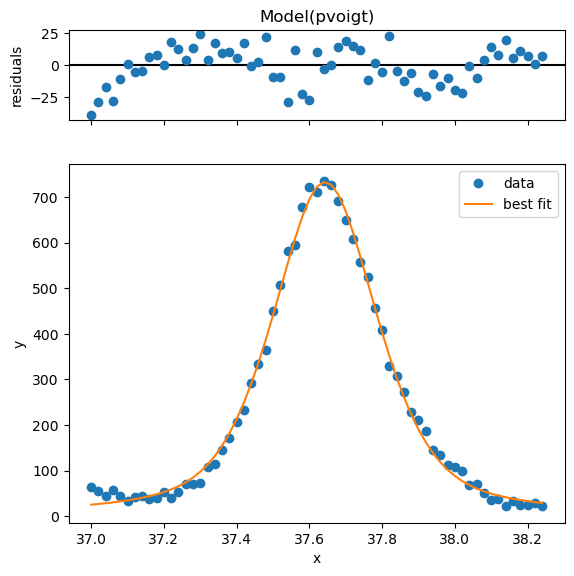

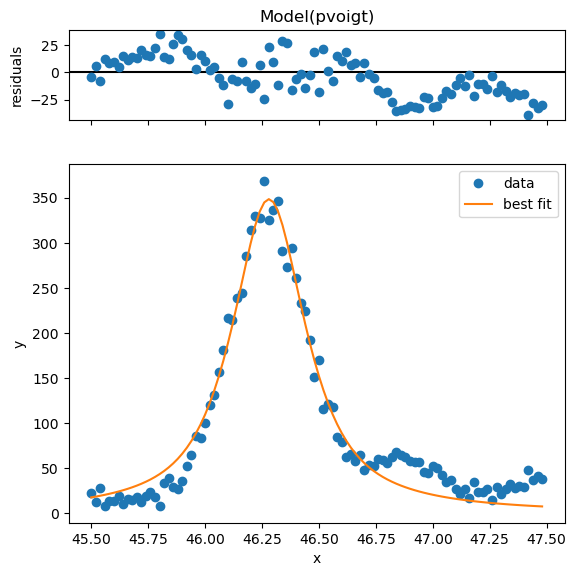

In [72]:
BiO_Alfa_5h_C1,BiO_Alfa_5h_B1 = pseudo_V(X=np.array(df_5h_p1['2theta']), Y=np.array(df_5h_p1['intensity']),plot_graph=True)
BiO_Alfa_5h_C2,BiO_Alfa_5h_B2 = pseudo_V(X=np.array(df_5h_p2['2theta']), Y=np.array(df_5h_p2['intensity']),plot_graph=True)
BiO_Alfa_5h = [[BiO_Alfa_5h_C1,BiO_Alfa_5h_C2],[BiO_Alfa_5h_B1,BiO_Alfa_5h_B2]]

In [74]:
def scherrer_eq_list(T, beta):
    lista=[]
    Lambda = 1.5406/10
    d = 0.94
    T = np.array(T)
    beta = np.array(beta)
    for i in range(len(T)):
        theta = T[i]/2
        theta = np.deg2rad(theta)
        B = beta[i]
        B =  np.deg2rad(B)
        L = (d*Lambda)/(B*np.cos(theta))
        lista.append(L)
        # print(L)
    print(lista)
    print(np.average(np.array(lista)))
    return(lista)

In [80]:
print('valores para BiO Alfa 1h')
scherrer_eq_list(T=BiO_Alfa_1h[0], beta=BiO_Alfa_1h[1]);
print("\n\n\n")
print('valores para BiO Alfa 5h')
scherrer_eq_list(T=BiO_Alfa_5h[0], beta=BiO_Alfa_5h[1]);

valores para BiO Alfa 1h
[18.61156857781249, 21.767508942601474]
20.189538760206982




valores para BiO Alfa 5h
[25.649976905786026, 23.153995812137293]
24.401986358961658
